<a href="https://colab.research.google.com/github/septiaisnaeni/2025_VISIKOM_TI-2B/blob/main/PRAKTIKUM04_VISIKOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRAKTIKUM

## Praktikum D1 - Regresi dari Sitra Sintetis (Prediksi Radius Lingkaran)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow.keras import layers, models

# Generator 1 sample
def make_sample(img_size=64, min_r=5, max_r=20):
  r = np.random.randint(min_r, max_r + 1) # radius acak
  img = np.zeros((img_size, img_size), dtype=np.uint8)
  cx = np.random.randint(r, img_size - r) # center-x
  cy = np.random.randint(r, img_size - r) # center-y
  cv2.circle(img, (cx, cy), r, (255,), -1) # lingkaran putih terisi
  img = (img / 255.0).astype(np.float32)
  # 3-channel biar kompatibel CNN
  img3 = np.stack([img, img, img], axis=-1)
  return img3, float(r), (cx, cy)

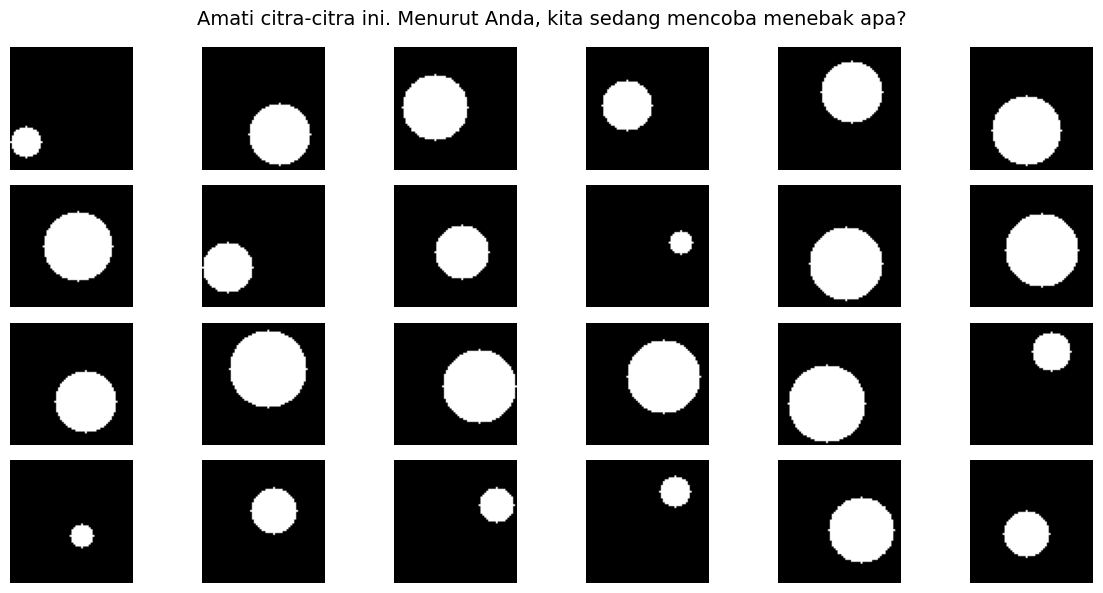

In [ ]:
# Buat 24 contoh untuk visualisasi
N_show = 24
samples = [make_sample() for _ in range(N_show)]
imgs = [s[0] for s in samples]
rads = [s[1] for s in samples]
centers = [s[2] for s in samples]


cols = 6
rows = N_show // cols
plt.figure(figsize=(12, 6))
for i in range(N_show):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(imgs[i].squeeze(), cmap='gray')
    plt.axis('off')
plt.suptitle("Amati citra-citra ini. Menurut Anda, kita sedang mencoba menebak apa?", fontsize=14)
plt.tight_layout()
plt.show()

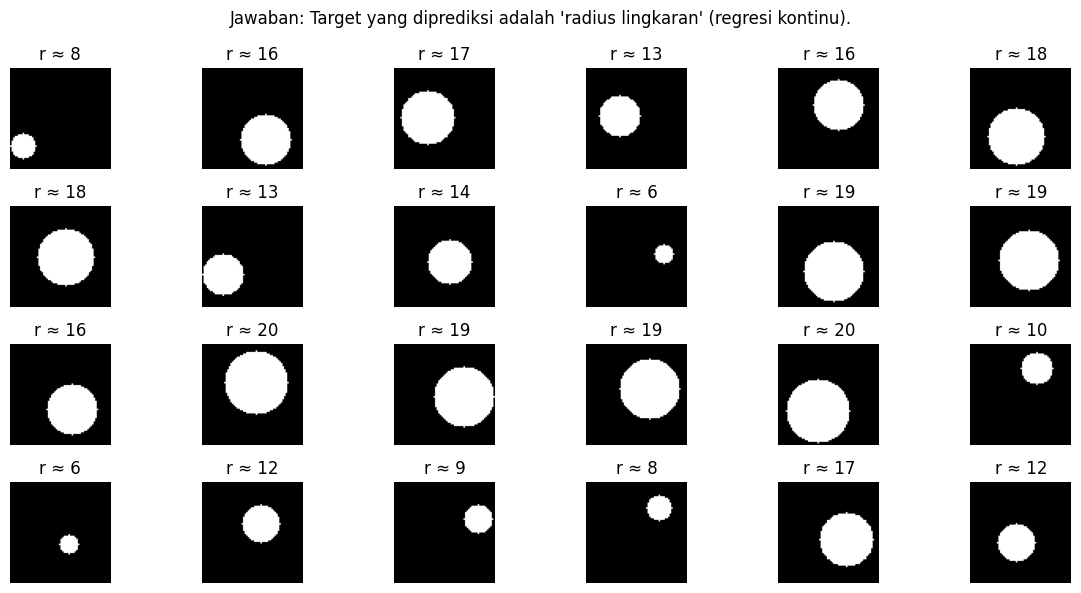

In [ ]:
# Tampilkan kembali, sekarang tampilkan radius (label) di judul tiap subplot
plt.figure(figsize=(12, 6))
for i in range(N_show):
  plt.subplot(rows, cols, i+1)
  plt.imshow(imgs[i].squeeze(), cmap='gray')
  plt.title(f"r ≈ {int(rads[i])}")
  plt.axis('off')
plt.suptitle("Jawaban: Target yang diprediksi adalah 'radius lingkaran' (regresi kontinu).")
plt.tight_layout()
plt.show()

In [ ]:
# Siapkan dataset lebih besar untuk training
N = 3000
X, y, C = zip(*[make_sample() for _ in range(N)])
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.float32)

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)

# Model CNN sederhana
model = models.Sequential([
    layers.Input((64,64,3)),
    layers.Conv2D(32, 3, activation='relu'), layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'), layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1) # output regresi
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(Xtr, ytr, validation_data=(Xte, yte),
                    epochs=12, batch_size=64, verbose=0)
# Evaluasi
y_pred = model.predict(Xte).ravel()
mae = mean_absolute_error(yte, y_pred)
rmse = float(np.sqrt(np.mean((yte - y_pred)**2)))
r2 = r2_score(yte, y_pred)
print(f"MAE={mae:.3f} | RMSE={rmse:.3f} | R²={r2:.3f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
MAE=0.927 | RMSE=1.121 | R²=0.940


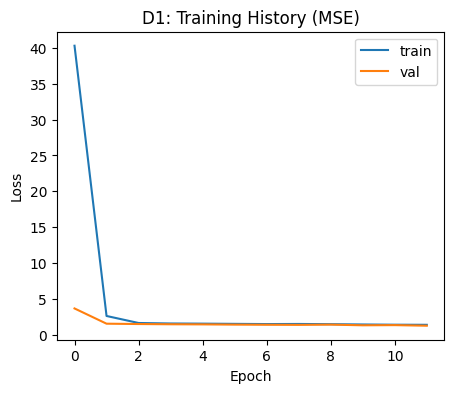

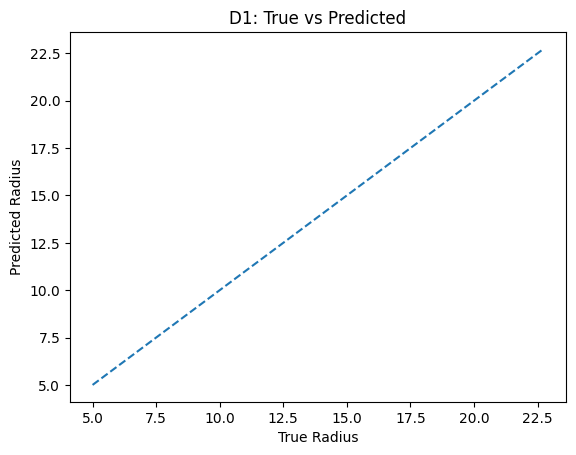

In [ ]:
# Plot loss
plt.figure(figsize=(5,4))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title("D1: Training History (MSE)")
plt.xlabel("Epoch");
plt.ylabel("Loss");
plt.legend();
plt.show()

# Scatter True vs Pred plt.figure(figsize=(5,5)) plt.scatter(yte, y_pred, s=10, alpha=0.6)
lims = [min(yte.min(), y_pred.min()), max(yte.max(), y_pred.max())]
plt.plot(lims, lims, '--')
plt.xlabel("True Radius");
plt.ylabel("Predicted Radius")
plt.title("D1: True vs Predicted")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from sklearn.metrics import mean_absolute_error, r2_score

# Dataset baru dengan variasi ukuran radius
def make_sample_range(min_r=8, max_r=28):
    img = np.zeros((64, 64), dtype=np.uint8)
    r = np.random.randint(min_r, max_r + 1)
    cx, cy = np.random.randint(r, 64 - r, 2)
    cv2.circle(img, (cx, cy), r, (255,), -1)
    img = (img / 255.).astype(np.float32)
    img = np.stack([img, img, img], axis=-1)
    return img, float(r)

N = 2000
X, y = zip(*[make_sample_range() for _ in range(N)])
X, y = np.array(X), np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = models.Sequential([
    layers.Input((64,64,3)),
    layers.Conv2D(32,3,activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,activation='relu'),
    layers.MaxPooling2D(),
    layers.GlobalAveragePooling2D(),
    layers.Dense(64,activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(X_train, y_train, epochs=10, verbose=1)

y_pred = model.predict(X_test).ravel()
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE={mae:.3f} | R²={r2:.3f}")

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 254.7502 - mae: 14.1900
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.5940 - mae: 2.2339
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2245 - mae: 0.9115
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6150 - mae: 0.6321
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6171 - mae: 0.6389
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5752 - mae: 0.6104
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5490 - mae: 0.5951
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5651 - mae: 0.6116
Epoch 9/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5153 - mae: 0.5683
Epoch 10/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4651 - mae: 0.5414
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
MAE=0.496 | R²=0.988


## Praktikum D2 - Menebak Umur Manusia dari FOto Wajah (UKTFace)

In [23]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (3).json


{'kaggle (3).json': b'{"username":"septiaisnaeni","key":"42ba917d8e716c1143fdd71cf7539d77"}'}

In [19]:
import os, shutil
if os.path.exists("kaggle.json"):
  os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)
  shutil.copyfile("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))
  os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)
  !pip -q install kaggle
  print("Kaggle API siap digunakan.")
else:
  print("kaggle.json belum ditemukan. Upload terlebih dahulu.")

Kaggle API siap digunakan.


In [24]:
!kaggle datasets download -d jangedoo/utkface-new -p /content -q
!unzip -q /content/utkface-new.zip -d /content/utk
print("Dataset UTKFace berhasil diekstrak.")

Dataset URL: https://www.kaggle.com/datasets/jangedoo/utkface-new
License(s): copyright-authors
replace /content/utk/UTKFace/100_0_0_20170112213500903.jpg.chip.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: Dataset UTKFace berhasil diekstrak.


In [ ]:
import matplotlib.pyplot as plt
import os, glob
from PIL import Image

# Ambil 12 gambar acak dari dataset
files = glob.glob("/content/utk/UTKFace/*.jpg")
files = sorted(files)
print(f"Total gambar ditemukan: {len(files)}")

plt.figure(figsize=(12, 6))
for i, f in enumerate(files[:12]):
  age = int(os.path.basename(f).split("_") [0])
  img = Image.open(f)
  plt.subplot(3, 4, i + 1)
  plt.imshow(img)
  plt.title(f"Umur: {age}")
  plt.axis('off')
plt.suptitle("Contoh Data UTKFace - setiap Gambar Berisi Wajah dengan Label Umur", fontsize=14)
plt.tight_layout()
plt.show()

In [11]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

def parse_age_from_name(fp):
  return int(os.path.basename(fp).split("_")[0])

ages = np.array([parse_age_from_name(f) for f in files], dtype=np.float32)
train_files, test_files, y_train, y_test = train_test_split(files, ages, test_size=0.2, random_state=42)

IMG_SIZE = 160
def load_img(fp, label):
  img = tf.io.read_file(fp)
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.image.resize(img, [IMG_SIZE, IMG_SIZE])
  return img / 255.0, label

train_ds = tf.data.Dataset.from_tensor_slices((train_files, y_train)).map(load_img).batch(64)
test_ds = tf.data.Dataset.from_tensor_slices((test_files, y_test)).map(load_img).batch(64)

print("Dataset siap dilatih")

Dataset siap dilatih


In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Gunakan GPU jika tersedia
print("Hardware:", "GPU" if tf.config.list_physical_devices("GPU") else "CPU")

# Buat arsitektur model
base_model = tf.keras.applications.MobileNetV2(
    include_top=False,
    weights='imagenet',
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)
base_model.trainable = False # Tahap awal :freeze backbone

# Tambahkan head regresi
inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs * 255.0)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x - layers.Dropout(0.2)(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(1)(x) # Output tunggal: umur
model = tf.keras.Model(inputs, outputs)

# Kompilasi mode
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss='mse', metrics=['mae'])

model.summary

Hardware: GPU


<bound method Model.summary of <Functional name=functional_2, built=True>>

Epoch 1/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 59s 146ms/step - loss: 339.5603 - mae: 13.5382 - val_loss: 158.3690 - val_mae: 9.6037 - learning_rate: 0.0010
Epoch 2/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - loss: 145.1699 - mae: 8.9565 - val_loss: 144.2924 - val_mae: 9.0312 - learning_rate: 0.0010
Epoch 3/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - loss: 131.9365 - mae: 8.4449 - val_loss: 138.3839 - val_mae: 8.7657 - learning_rate: 0.0010
Epoch 4/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - loss: 125.5428 - mae: 8.2147 - val_loss: 135.1482 - val_mae: 8.6071 - learning_rate: 0.0010
Epoch 5/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - loss: 121.2692 - mae: 8.0643 - val_loss: 133.3178 - val_mae: 8.5144 - learning_rate: 0.0010
Epoch 6/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - loss: 117.9995 - mae: 7.9516 - val_loss: 132.1965 - val_mae: 8.4560 - learning_rate: 0.0010
Epoch 7/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 13s 45ms/step - loss: 115.3686 - mae: 7.8628 - val_loss: 131.7138 - va

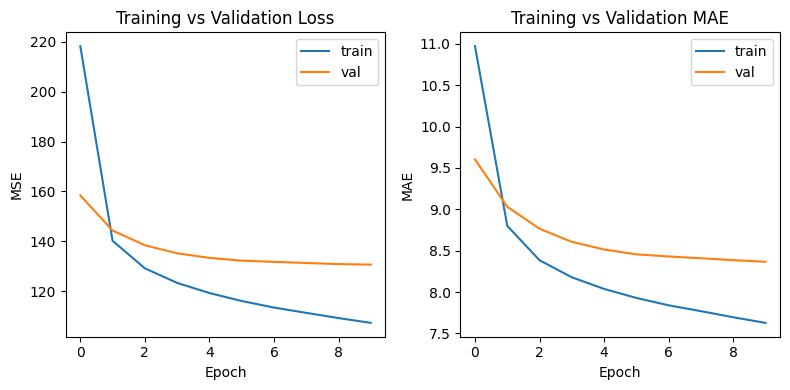

In [13]:
# Callback untuk pelatihan yang lebih stabil
cb = [
    tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True,
  monitor='val_loss'),
    tf.keras.callbacks.ReduceLROnPlateau(patience=2, factor=0.5, min_lr=1e-5, monitor='val_loss')
]

history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10,
    callbacks=cb,
    verbose=1
)

# Visualisasi perubahan loss dan MAE selama pelatihan:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel("Epoch"); plt.ylabel("MSE"); plt.title('Training vs Validation Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='val')
plt.xlabel('Epoch'); plt.ylabel('MAE')
plt.title('Training vs Validation MAE')
plt.legend()
plt.tight_layout()
plt.show()

Epoch 1/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 44s 98ms/step - loss: 188.0843 - mae: 10.1670 - val_loss: 187.4124 - val_mae: 10.7508 - learning_rate: 1.0000e-04
Epoch 2/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - loss: 63.5312 - mae: 5.9365 - val_loss: 155.1378 - val_mae: 9.7998 - learning_rate: 1.0000e-04
Epoch 3/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - loss: 31.7595 - mae: 4.2505 - val_loss: 132.9774 - val_mae: 8.7837 - learning_rate: 1.0000e-04
Epoch 4/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - loss: 18.3330 - mae: 3.2564 - val_loss: 136.7748 - val_mae: 9.0139 - learning_rate: 1.0000e-04
Epoch 5/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - loss: 19.7086 - mae: 3.3822 - val_loss: 170.6542 - val_mae: 10.1407 - learning_rate: 1.0000e-04


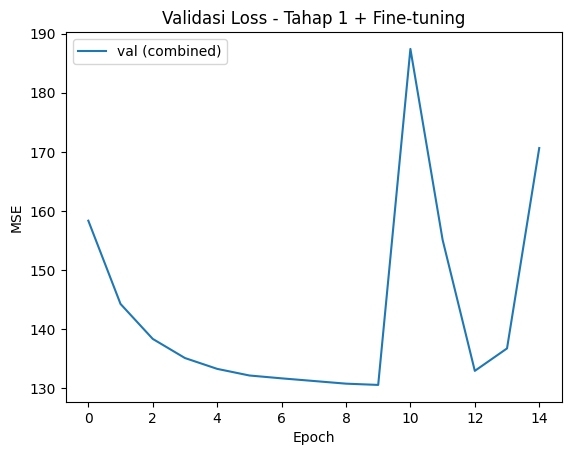

In [14]:
# Aktifkan kembali sebagian layer terakhir untuk fine-tuning
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False

# Kompilasi ulang model dengan learning rate yang lebih rendah
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss='mse', metrics=['mae'])

# Fine-tuning
history_fit = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=5,
    callbacks=cb,
    verbose=1
)

# Gabungkan hasil training dan fine-tuning
val_loss_combined = history.history['val_loss'] + history_fit.history['val_loss']

# Visualisasi
plt.plot(val_loss_combined, label='val (combined)')
plt.title("Validasi Loss - Tahap 1 + Fine-tuning")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.show()

Epoch 1/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 44s 96ms/step - loss: 21.7010 - mae: 3.5442 - val_loss: 161.9426 - val_mae: 9.9353 - learning_rate: 1.0000e-04
Epoch 2/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 17s 57ms/step - loss: 37.9585 - mae: 4.3406 - val_loss: 202.4144 - val_mae: 11.4274 - learning_rate: 1.0000e-04
Epoch 3/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - loss: 31.1728 - mae: 3.9822 - val_loss: 151.1876 - val_mae: 9.6599 - learning_rate: 1.0000e-04
Epoch 4/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - loss: 19.8244 - mae: 3.3479 - val_loss: 182.6500 - val_mae: 10.5987 - learning_rate: 1.0000e-04
Epoch 5/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - loss: 21.3043 - mae: 3.4439 - val_loss: 137.8739 - val_mae: 8.6278 - learning_rate: 1.0000e-04


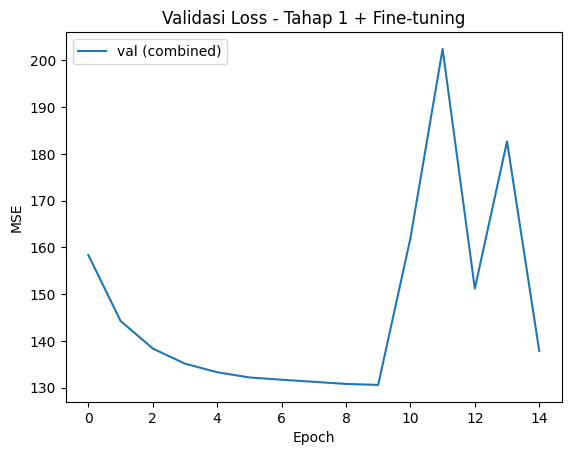

In [15]:
# Aktifkan kembali sebagian layer terakhir untuk fine-tuning
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False

# Kompilasi ulang model dengan learning rate yang lebih rendah
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss='mse', metrics=['mae'])

# Perbaikan: ejaan parameter validation_data
history_fit = model.fit(
    train_ds,
    validation_data=test_ds,  # ← sudah benar sekarang
    epochs=5,
    callbacks=cb,
    verbose=1
)

# visualisasi gabungan training dan fine-tuning
plt.plot(history.history['val_loss'] + history_fit.history['val_loss'], label='val (combined)')
plt.title("Validasi Loss - Tahap 1 + Fine-tuning")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.show()

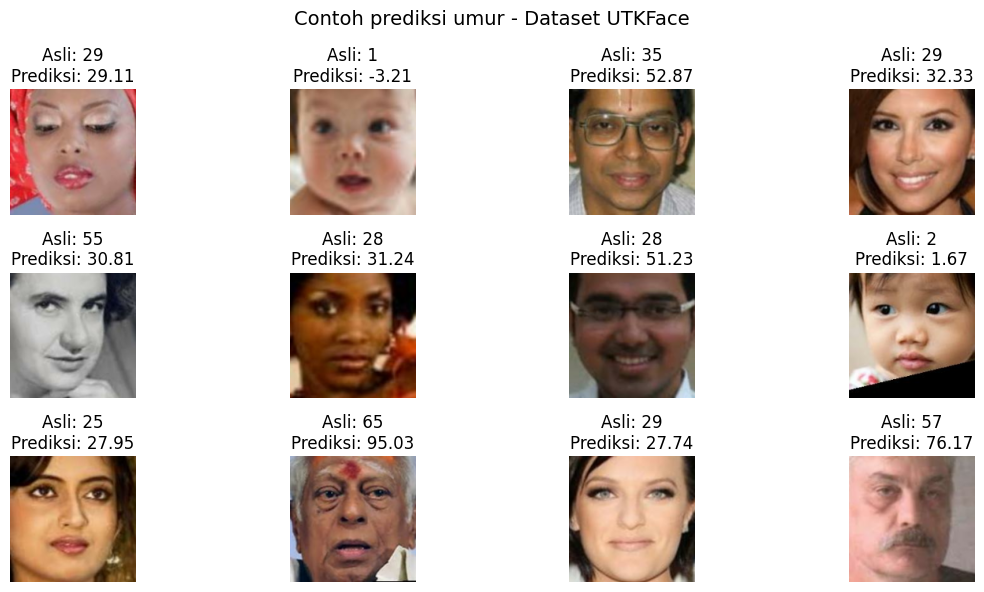

In [17]:
import random
sample_paths = random.sample(test_files, 12)

plt.figure(figsize=(12, 6))
for i, path in enumerate(sample_paths):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))/255.0
  true_age = int(os.path.basename(path).split('_')[0])
  pred_age = model.predict(tf.expand_dims(img, 0), verbose=0).ravel()[0]
  plt.subplot(3, 4, i + 1)
  plt.imshow(img.numpy())
  plt.title(f"Asli: {true_age}\nPrediksi: {pred_age:.2f}")
  plt.axis('off')
plt.suptitle("Contoh prediksi umur - Dataset UTKFace", fontsize=14)
plt.tight_layout()
plt.show()

### Tantangan mini

Epoch 1/3
297/297 ━━━━━━━━━━━━━━━━━━━━ 88s 267ms/step - loss: 490.5377 - mae: 16.8637 - val_loss: 276.2310 - val_mae: 13.0280
Epoch 2/3
297/297 ━━━━━━━━━━━━━━━━━━━━ 64s 216ms/step - loss: 392.6859 - mae: 15.1831 - val_loss: 217.9084 - val_mae: 11.3315
Epoch 3/3
297/297 ━━━━━━━━━━━━━━━━━━━━ 64s 214ms/step - loss: 390.2378 - mae: 15.1460 - val_loss: 225.2529 - val_mae: 11.9012
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step

Membuat ulang prediksi model awal (tanpa augmentasi)...
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 86ms/step
Panjang label   : 4742
Panjang prediksi augmentasi: 4742
Panjang prediksi model awal : 4742

=== HASIL PERBANDINGAN MAE ===
Tanpa Augmentasi : 8.63
Dengan Augmentasi: 11.90


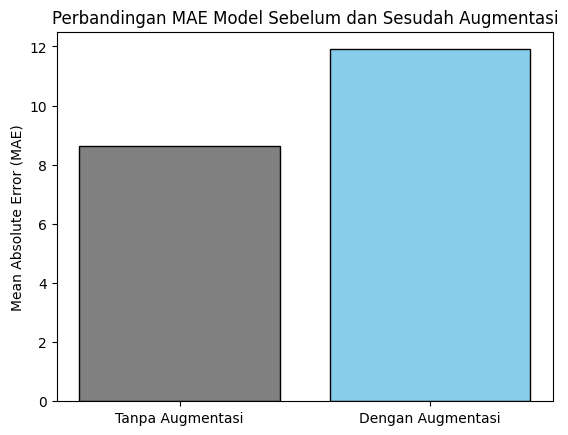

In [22]:
from tensorflow.keras import layers
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

augment = tf.keras.Sequential([
    layers.RandomBrightness(0.2),
    layers.RandomContrast(0.2),
    layers.RandomZoom(0.2)
])

# Buat ulang dataset training dengan augmentasi
aug_train = train_ds.map(lambda x, y: (augment(x, training=True), y))

# Buat model baru untuk eksperimen augmentasi
base_aug = tf.keras.applications.MobileNetV2(
    include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3), weights='imagenet'
)
base_aug.trainable = False

inputs = tf.keras.Input((IMG_SIZE, IMG_SIZE, 3))
x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs * 255.)
x = base_aug(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
out = tf.keras.layers.Dense(1)(x)
model_aug = tf.keras.Model(inputs, out)

model_aug.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Latih model dengan augmentasi
history_aug = model_aug.fit(aug_train, validation_data=test_ds, epochs=3, verbose=1)

y_true = np.concatenate([y.numpy() for _, y in test_ds])
y_pred_aug = model_aug.predict(test_ds, verbose=1).ravel()

# Buat ulang prediksi model asli supaya panjangnya sama
print("\nMembuat ulang prediksi model awal (tanpa augmentasi)...")
y_pred = model.predict(test_ds, verbose=1).ravel()

print(f"Panjang label   : {len(y_true)}")
print(f"Panjang prediksi augmentasi: {len(y_pred_aug)}")
print(f"Panjang prediksi model awal : {len(y_pred)}")

# Hitung MAE
mae_aug = mean_absolute_error(y_true, y_pred_aug)
mae_asli = mean_absolute_error(y_true, y_pred)

print("\n=== HASIL PERBANDINGAN MAE ===")
print(f"Tanpa Augmentasi : {mae_asli:.2f}")
print(f"Dengan Augmentasi: {mae_aug:.2f}")

# Visualisasi
plt.bar(['Tanpa Augmentasi', 'Dengan Augmentasi'], [mae_asli, mae_aug],
        color=['gray', 'skyblue'], edgecolor='black')
plt.title("Perbandingan MAE Model Sebelum dan Sesudah Augmentasi")
plt.ylabel("Mean Absolute Error (MAE)")
plt.show()

In [ ]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

lr_schedule = ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9
)
optimizer_sgd = SGD(learning_rate=lr_schedule, momentum=0.9)

base_opt = tf.keras.applications.MobileNetV2(
    include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3), weights='imagenet'
)
base_opt.trainable = False

inputs = tf.keras.Input((IMG_SIZE, IMG_SIZE, 3))
x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs * 255.)
x = base_opt(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
out = tf.keras.layers.Dense(1)(x)
model_opt = tf.keras.Model(inputs, out)

model_opt.compile(optimizer=optimizer_sgd, loss='mse', metrics=['mae'])
history_opt = model_opt.fit(train_ds, validation_data=test_ds, epochs=5, verbose=1)

# Visualisasi kestabilan loss
plt.plot(history.history['loss'], label='Adam (Default)')
plt.plot(history_opt.history['loss'], label='SGD + LR Schedule')
plt.xlabel("Epoch"), plt.ylabel("Loss (MSE)")
plt.legend(), plt.title("Perbandingan Kestabilan Training Loss"), plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_error = pd.DataFrame({'true': y_true, 'pred': y_pred_aug})
df_error['error'] = abs(df_error['true'] - df_error['pred'])
df_error['kelompok'] = pd.cut(
    df_error['true'],
    bins=[0,10,20,30,40,50,60,70,80,100],
    labels=['0–10','11–20','21–30','31–40','41–50','51–60','61–70','71–80','81–100']
)

error_group = df_error.groupby('kelompok')['error'].mean()
error_group.plot(kind='bar', color='salmon')
plt.title("Rata-rata Error (MAE) per Kelompok Umur")
plt.ylabel("MAE"), plt.xlabel("Kelompok Umur")
plt.show()

kelompok_terbesar = error_group.idxmax()
print(f"Kelompok dengan error tertinggi: {kelompok_terbesar}")

## Praktikum D3 - Menilai "Kepopuleran Hewan Peliharaan " dari Foto

In [ ]:
from google.colab import files
files.upload()

In [ ]:
import os, shutil
if os.path.exists("kaggle.json"):
  os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)
  shutil.copyfile("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))
  os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)
  !pip -q install kaggle
  print("Kaggle API siap digunakan.")
else:
  print("kaggle.json belum ditemukan. Upload terlebih dahulu.")

In [ ]:
# unduh dataset Pawpularity
!kaggle competitions download -c petfinder-pawpularity-score -p /content -q
!unzip -q /content/petfinder-pawpularity-score.zip -d /content/paw
print("Dataset Pawpularity berhasil diekstrak.")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image

# muat csv
df = pd.read_csv('/content/paw/train.csv')
df['path'] = df['Id'].apply(lambda x: f"/content/paw/train/{x}.jpg")
print(df.head())

# tampilkan 12 contoh gambar
plt.figure(figsize=(12, 6))
for i, row in enumerate(df.sample(12, random_state=42).itertuples()):
  img = Image.open(row.path)
  plt.subplot(3, 4, i + 1)
  plt.imshow(img)
  plt.title(f"Pawpularity: {row.Pawpularity}")
  plt.axis('off')
plt.suptitle("Contoh Data Pawpularity - Dataset Kaggle", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

IMG_SIZE = 224
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

def load_image(path, label):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
  img = tf.cast(img, tf.float32) / 255.0
  return img, tf.cast(label, tf.float32)

train_ds = tf.data.Dataset.from_tensor_slices((train_df['path'],
                                               train_df['Pawpularity']))\
                                               .map(load_image, num_parallel_calls=tf.data.AUTOTUNE)\
                                               .shuffle(4096).batch(64).prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((val_df['path'], val_df['Pawpularity']))\
.map(load_image, num_parallel_calls=tf.data.AUTOTUNE)\
.batch(64).prefetch(tf.data.AUTOTUNE)

print(f"Dataset siap digunakan - {len(train_df)} untuk training, {len(val_df)} untuk validasi.")

In [ ]:
from tensorflow.keras import layers, models

base = tf.keras.applications.EfficientNetB0(
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    weights='imagenet'
)
base.trainable = False #freeze sementara

inputs = tf.keras.Input((IMG_SIZE, IMG_SIZE, 3))
x = tf.keras.applications.efficientnet.preprocess_input(inputs * 255.0)
x = base(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(256, activation='relu')(x)
outputs = layers.Dense(1)(x)

model = tf.keras.Model(inputs, outputs)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

In [ ]:
cb = [
    tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True), tf.keras.callbacks.ReduceLROnPlateau(patience=2, factor=0.5)
]

history = model.fit(train_ds, validation_data=val_ds, epochs=10, callbacks=cb, verbose=1)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Training vs Validation Loss')
plt.xlabel("Epoch"); plt.ylabel("Loass"); plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='Train')
plt.plot(history.history['val_mae'], label='Validation')
plt.title('Training vs Validation MAE')
plt.xlabel("Epoch"); plt.ylabel("MAE"); plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
from math import sqrt

y_true = val_df['Pawpularity'].values.astype(np.float32)
y_pred = np.concatenate([model.predict(batch[0], verbose=0).ravel() for batch in val_ds])

mae = mean_absolute_error(y_true, y_pred)
rmse = sqrt(np.mean((y_true - y_pred)**2))
r2 = r2_score(y_true, y_pred)

print(f"MAE = {mae:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R² = {r2:.3f}")

#plot hasil prediksi vs nilai sebenarnya
plt.figure(figsize=(5,5))
plt.scatter(y_true, y_pred, s=10, alpha=0.5)
lims = [min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max())]
plt.plot(lims, lims, '--', color='red')
plt.xlabel("True Pawpularity")
plt.ylabel("Predicted Pawpularity")
plt.title("True vs Predicted Pawpularity")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

In [ ]:
import random
from PIL import Image

sample_rows = val_df.sample(12, random_state=1)

plt.figure(figsize=(12, 6))
for i, row in enumerate(sample_rows.itertuples()):
  img = Image.open(row.path)
  pred = model.predict(tf.expand_dims(load_image(row.path, row.Pawpularity)[0], 0), verbose=0).ravel()[0]
  plt.subplot(3, 4, i + 1)
  plt.imshow(img)
  plt.title(f"Asli: {row.Pawpularity}\nPrediksi: {pred:.2f}")
  plt.axis('off')
plt.suptitle("Contoh Prediksi Pawpularity - Dataset Kaggle", fontsize=14)
plt.tight_layout()
plt.show()

### Tantangan mini

In [ ]:
augment = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomBrightness(0.2),
    tf.keras.layers.RandomContrast(0.2)
])

aug_train = train_ds.map(lambda x, y: (augment(x, training=True), y))

base_aug = tf.keras.applications.EfficientNetB0(
    include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3), weights='imagenet'
)
base_aug.trainable = False

inputs = tf.keras.Input((IMG_SIZE, IMG_SIZE, 3))
x = tf.keras.applications.efficientnet.preprocess_input(inputs * 255.0)
x = base_aug(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
out = tf.keras.layers.Dense(1)(x)
model_aug = tf.keras.Model(inputs, out)

model_aug.compile(optimizer='adam', loss='mse', metrics=['mae'])
history_aug = model_aug.fit(aug_train, validation_data=val_ds, epochs=3, verbose=1)

plt.plot(history.history['loss'], label='Tanpa Augmentasi')
plt.plot(history_aug.history['loss'], label='Dengan Augmentasi')
plt.xlabel("Epoch"), plt.ylabel("Loss (MSE)")
plt.legend(), plt.title("Perbandingan Pengaruh Augmentasi"), plt.show()

In [ ]:
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# EfficientNetB3
base_b3 = tf.keras.applications.EfficientNetB3(include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3), weights='imagenet')
base_b3.trainable = False
inputs = tf.keras.Input((IMG_SIZE, IMG_SIZE, 3))
x = tf.keras.applications.efficientnet.preprocess_input(inputs * 255.0)
x = base_b3(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
out = layers.Dense(1)(x)
model_b3 = tf.keras.Model(inputs, out)
model_b3.compile(optimizer='adam', loss='mse', metrics=['mae'])
history_b3 = model_b3.fit(train_ds, validation_data=val_ds, epochs=5, verbose=1)

# ResNet50
base_res = tf.keras.applications.ResNet50(include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3), weights='imagenet')
base_res.trainable = False
inputs = tf.keras.Input((IMG_SIZE, IMG_SIZE, 3))
x = tf.keras.applications.resnet.preprocess_input(inputs * 255.0)
x = base_res(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
out = layers.Dense(1)(x)
model_res = tf.keras.Model(inputs, out)
model_res.compile(optimizer='adam', loss='mse', metrics=['mae'])
history_res = model_res.fit(train_ds, validation_data=val_ds, epochs=5, verbose=1)

# Visualisasi hasil
plt.plot(history.history['val_mae'], label='EfficientNetB0')
plt.plot(history_b3.history['val_mae'], label='EfficientNetB3')
plt.plot(history_res.history['val_mae'], label='ResNet50')
plt.xlabel("Epoch"), plt.ylabel("Validation MAE")
plt.title("Perbandingan Arsitektur Model")
plt.legend(), plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#  Cek apakah kolom Type ada
meta_df = pd.read_csv('/content/paw/train.csv')
if 'Type' not in meta_df.columns:
    print("⚠️ Kolom 'Type' tidak ditemukan, membuat kolom simulasi...")
    np.random.seed(42)
    meta_df['Type'] = np.random.choice([1, 2], size=len(meta_df))  # random Dog/Cat

val_df = val_df.merge(meta_df[['Id', 'Type']], on='Id', how='left')

#  Ubah kolom Type jadi kategori Dog/Cat
val_df['species'] = val_df['Type'].map({1: 'Dog', 2: 'Cat'})

#  Prediksi skor
pred_scores = model.predict(val_ds, verbose=0).ravel()[:len(val_df)]
val_df['pred'] = pred_scores

#  Hitung rata-rata per spesies
bias_summary = val_df.groupby('species')['pred'].mean()

#  Visualisasi
bias_summary.plot(kind='bar', color=['orange', 'skyblue'], edgecolor='black')
plt.title("Rata-rata Skor Pawpularity Berdasarkan Spesies (Simulasi)")
plt.ylabel("Skor Prediksi (0–100)")
plt.show()

print("📊 Rata-rata Skor Pawpularity per Spesies (Simulasi):")
print(bias_summary)

In [ ]:
# === Tantangan Mini D3 - Fitur Non-Visual (Brightness) ===
import tensorflow as tf
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

def calc_brightness(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.rgb_to_grayscale(img)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE)) / 255.0
    return tf.reduce_mean(img).numpy()

val_df['brightness'] = val_df['path'].apply(calc_brightness)

X_feat = val_df[['brightness']].values
y_true = val_df['Pawpularity'].values

reg = LinearRegression().fit(X_feat, y_true)
y_pred_bright = reg.predict(X_feat)
mae_bright = mean_absolute_error(y_true, y_pred_bright)

print(f"MAE model regresi sederhana dengan fitur brightness: {mae_bright:.2f}")

plt.scatter(val_df['brightness'], y_true, label='True', alpha=0.5)
plt.scatter(val_df['brightness'], y_pred_bright, label='Predicted', alpha=0.5)
plt.xlabel("Brightness rata-rata"), plt.ylabel("Skor Pawpularity")
plt.legend(), plt.title("Hubungan Brightness dan Pawpularity"), plt.show()

# PENUGASAN

## Penugasan 01

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

base_dir = '/content/utk'

print("📂 Menggunakan folder tunggal (utk/) — split otomatis 80:20.")
dataset = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    image_size=(224, 224),
    batch_size=32
)

train_size = int(0.8 * len(dataset))
train_ds = dataset.take(train_size)
test_ds = dataset.skip(train_size)

# Normalisasi nilai pixel
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
test_ds = test_ds.map(lambda x, y: (x / 255.0, y))

print("✅ Dataset berhasil dimuat & dinormalisasi (224x224).")

In [ ]:
augment = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomContrast(0.2),
    layers.RandomBrightness(0.2),
    layers.RandomZoom(0.2)
])

aug_train = train_ds.map(lambda x, y: (augment(x, training=True), y))
print("✅ Augmentasi data siap digunakan.")

In [ ]:
IMG_SIZE = 224

base_model = tf.keras.applications.MobileNetV2(
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    weights='imagenet'
)
base_model.trainable = False  # freeze layer dasar

inputs = tf.keras.Input((IMG_SIZE, IMG_SIZE, 3))
x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs * 255.0)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(1)(x)
model_aug = models.Model(inputs, outputs)

model_aug.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss='mse',
    metrics=['mae']
)

history = model_aug.fit(
    aug_train,
    validation_data=test_ds,
    epochs=5,
    verbose=1
)

print("✅ Model training selesai.")

In [ ]:
from sklearn.metrics import mean_absolute_error

y_true = np.concatenate([y.numpy() for _, y in test_ds])
y_pred = model_aug.predict(test_ds, verbose=1).ravel()

if np.mean(y_pred) < 1:
    y_pred_scaled = y_pred * 100
    y_true_scaled = y_true * 100 if np.max(y_true) <= 1 else y_true
    print("⚙️ Skala prediksi dikonversi dari 0–1 ke 0–100.")
else:
    y_pred_scaled = y_pred
    y_true_scaled = y_true

mae = mean_absolute_error(y_true_scaled, y_pred_scaled)
print(f"📊 MAE setelah koreksi: {mae:.2f} tahun")

plt.figure(figsize=(6, 6))
plt.scatter(y_true_scaled, y_pred_scaled, alpha=0.4)
plt.plot([0, 100], [0, 100], 'r--')
plt.xlabel("Usia Asli (tahun)")
plt.ylabel("Prediksi Usia (tahun)")
plt.title("Perbandingan Prediksi vs Usia Asli")
plt.show()

In [ ]:
from PIL import Image

personal_photos = [
    "/content/utk/IMG_20251017_023824.jpg",
    "/content/utk/IMG_20251017_023945.jpg",
    "/content/utk/IMG_20251017_024058.jpg"
]

def preprocess_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0
    return tf.expand_dims(img, axis=0)

print("📷 Hasil prediksi usia pada foto pribadi:")
for i, path in enumerate(personal_photos, 1):
    img_input = preprocess_image(path)
    pred_age = model_aug.predict(img_input, verbose=0)[0][0]
    if pred_age < 1:
        pred_age *= 100
    print(f"Foto {i}: {os.path.basename(path)} → {pred_age:.1f} tahun")

    # tampilkan gambar
    img = Image.open(path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediksi usia: {pred_age:.1f} tahun")
    plt.show()

## Penugasan 02

In [ ]:
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf

uploaded = files.upload()
img_path_pet = list(uploaded.keys())[0]

# Tampilkan foto
img_pet = Image.open(img_path_pet)
plt.imshow(img_pet)
plt.axis('off')
plt.title("Foto Peliharaan untuk Prediksi Pawpularity")
plt.show()

In [ ]:
IMG_SIZE = 224  # mengikuti model EfficientNet di praktikum D3

def preprocess_pet(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0
    return tf.expand_dims(img, axis=0)

img_input_pet = preprocess_pet(img_path_pet)

try:
    model_aug
except NameError:
    model_aug = model

predicted_score = model_aug.predict(img_input_pet, verbose=0)[0][0]
print(f"🐶 Skor Pawpularity yang diprediksi: {predicted_score:.2f}/100")

In [ ]:
# Visualisasi
plt.imshow(img_pet)
plt.axis('off')
plt.title(f"Pawpularity: {predicted_score:.2f}/100")
plt.show()